In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file=pd.read_csv('/content/drive/MyDrive/0.MKCE/2.Linear with SGD/2 Project/Vehicle Performance Prediction/Dataset/data.csv')
df=pd.DataFrame(file)

In [3]:
df

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443
...,...,...,...,...,...,...,...,...,...
393,1,4,140.0,86,2790,15.6,1982,ford mustang gl,11.478880
394,2,4,97.0,52,2130,24.6,1982,vw pickup,18.706323
395,1,4,135.0,84,2295,11.6,1982,dodge rampage,13.604599
396,1,4,120.0,79,2625,18.6,1982,ford ranger,11.904024


**Exploratory data analysis**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    object 
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
df.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443


In [6]:
df.isna().sum()

origin                 0
cylinders              0
displacement           0
horsepower             0
weight                 0
acceleration           0
year                   0
name                   0
Kilometer_per_liter    0
dtype: int64

**there is no null values**

In [8]:
set(df['horsepower'])

{'100',
 '102',
 '103',
 '105',
 '107',
 '108',
 '110',
 '112',
 '113',
 '115',
 '116',
 '120',
 '122',
 '125',
 '129',
 '130',
 '132',
 '133',
 '135',
 '137',
 '138',
 '139',
 '140',
 '142',
 '145',
 '148',
 '149',
 '150',
 '152',
 '153',
 '155',
 '158',
 '160',
 '165',
 '167',
 '170',
 '175',
 '180',
 '190',
 '193',
 '198',
 '200',
 '208',
 '210',
 '215',
 '220',
 '225',
 '230',
 '46',
 '48',
 '49',
 '52',
 '53',
 '54',
 '58',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '?'}

In [9]:
df['horsepower'].replace('?','0',inplace=True)

In [10]:
df['horsepower']=df['horsepower'].astype('float')

**Replacing the ? values in horsepower with o. and then converting the datatype to float**

In [11]:
df[df.duplicated()]

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter


**there is no duplicates in dataset**

In [12]:
df.describe()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,1.572864,5.454774,193.425879,102.894472,2970.424623,15.568090,1976.010050,9.997073
std,0.802055,1.701004,104.269838,40.269544,846.841774,2.757689,3.697627,3.322917
min,1.000000,3.000000,68.000000,0.000000,1613.000000,8.000000,1970.000000,3.826293
25%,1.000000,4.000000,104.250000,75.000000,2223.750000,13.825000,1973.000000,7.440015
50%,1.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,1976.000000,9.778305
75%,2.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,1979.000000,12.329168
max,3.000000,8.000000,455.000000,230.000000,5140.000000,24.800000,1982.000000,19.811697


**statistical analysis of each and every feature in dataset**

# UNIVARIATE AND BIVARIATE ANALYSIS

In [13]:
df.corr().style.background_gradient(cmap='coolwarm')

,origin,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter
origin,1.000000,-0.562543,-0.609409,-0.418636,-0.581024,0.205873,0.180662,0.563450
cylinders,-0.562543,1.000000,0.950721,0.821656,0.896017,-0.505419,-0.348746,-0.775396
displacement,-0.609409,0.950721,1.000000,0.871927,0.932824,-0.543684,-0.370164,-0.804203
horsepower,-0.418636,0.821656,0.871927,1.000000,0.837987,-0.673940,-0.411587,-0.754276
weight,-0.581024,0.896017,0.932824,0.837987,1.000000,-0.417457,-0.306564,-0.831741
acceleration,0.205873,-0.505419,-0.543684,-0.673940,-0.417457,1.000000,0.288137,0.420289
year,0.180662,-0.348746,-0.370164,-0.411587,-0.306564,0.288137,1.000000,0.579267
Kilometer_per_liter,0.563450,-0.775396,-0.804203,-0.754276,-0.831741,0.420289,0.579267,1.000000


(array([13., 78., 73., 61., 54., 48., 38., 22.,  5.,  6.]),
 array([ 3.82629337,  5.42483371,  7.02337405,  8.62191439, 10.22045473,
        11.81899507, 13.41753541, 15.01607575, 16.61461609, 18.21315643,
        19.81169677]),
 <a list of 10 Patch objects>)

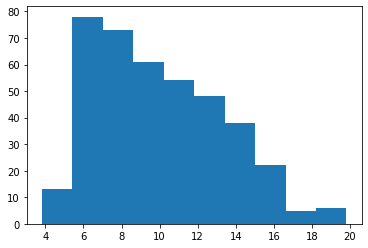

In [14]:
plt.hist(df['Kilometer_per_liter'])

**the milage of 6km to 7km is mostly given by many vehicles**

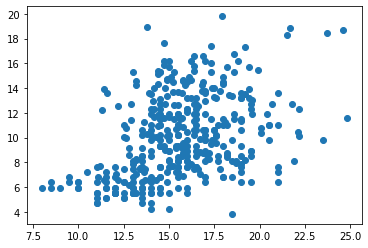

In [15]:
plt.scatter(df['acceleration'],df['Kilometer_per_liter'])

**it is seems to be that the acceleration and mileage have positive linear relationship**

<BarContainer object of 398 artists>

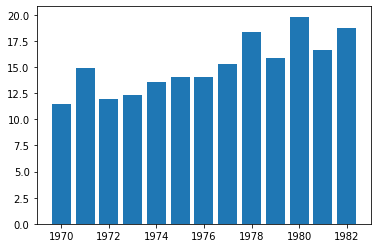

In [17]:
plt.bar(df['year'],df['Kilometer_per_liter'])

In [24]:
df['Kilometer_per_liter']

0       7.652587
1       6.377156
2       7.652587
3       6.802299
4       7.227443
         ...    
393    11.478880
394    18.706323
395    13.604599
396    11.904024
397    13.179455
Name: Kilometer_per_liter, Length: 398, dtype: float64

**It seems to have newly coming vehicles are giving better mileage when compared to old vehicles**

In [29]:
df_sort=df.sort_values(by='Kilometer_per_liter', ascending=False)
df_sort.head(10).iloc[:,7]

322                          mazda glc
329                honda civic 1500 gl
325               vw rabbit c (diesel)
394                          vw pickup
326                 vw dasher (diesel)
244    volkswagen rabbit custom diesel
309                          vw rabbit
330               renault lecar deluxe
324                         datsun 210
247                     datsun b210 gx
Name: name, dtype: object

<BarContainer object of 10 artists>

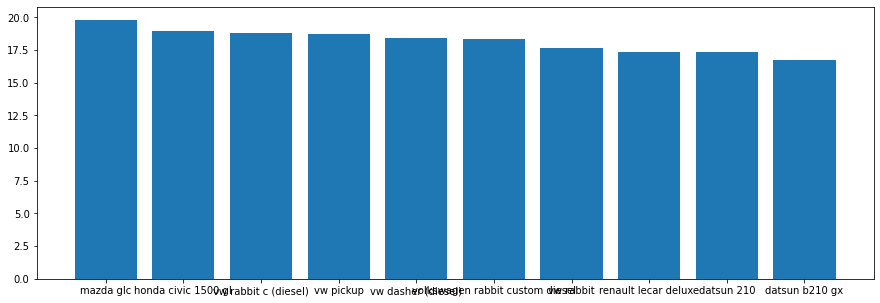

In [41]:
plt.figure(figsize=(15,5))
plt.bar(df_sort['name'][0:10],df_sort['Kilometer_per_liter'][0:10])

**top 10 company names that produces high mileage**

In [30]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


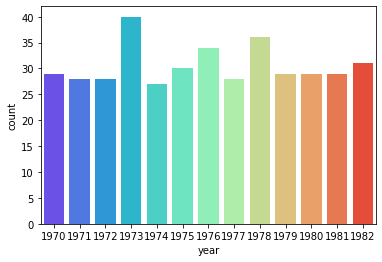

In [31]:
sns.countplot(df['year'],palette = "rainbow")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


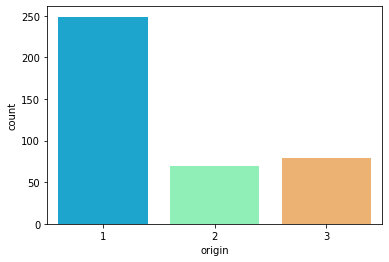

In [32]:
sns.countplot(df['origin'],palette='rainbow')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


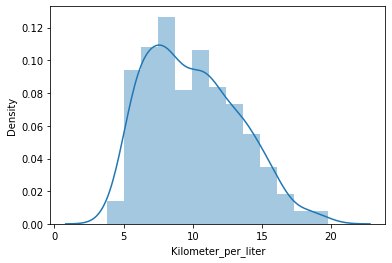

In [33]:
sns.distplot(df['Kilometer_per_liter'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


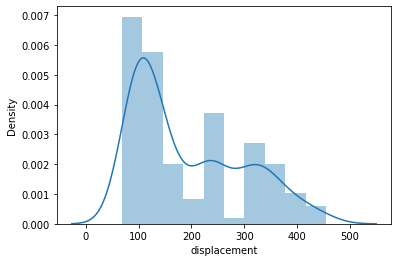

In [34]:
sns.distplot(df['displacement'])

# FITTING LINEARSGD MODEL

In [45]:
df.drop(['name'],axis=1,inplace=True)

**name column is not needed for analysis**

In [46]:
x=df.iloc[:,:-1]
x

,origin,cylinders,displacement,horsepower,weight,acceleration,year
0,1,8,307.0,130.0,3504,12.0,1970
1,1,8,350.0,165.0,3693,11.5,1970
2,1,8,318.0,150.0,3436,11.0,1970
3,1,8,304.0,150.0,3433,12.0,1970
4,1,8,302.0,140.0,3449,10.5,1970
...,...,...,...,...,...,...,...
393,1,4,140.0,86.0,2790,15.6,1982
394,2,4,97.0,52.0,2130,24.6,1982
395,1,4,135.0,84.0,2295,11.6,1982
396,1,4,120.0,79.0,2625,18.6,1982


In [47]:
y=df.iloc[:,-1]
y

0       7.652587
1       6.377156
2       7.652587
3       6.802299
4       7.227443
         ...    
393    11.478880
394    18.706323
395    13.604599
396    11.904024
397    13.179455
Name: Kilometer_per_liter, Length: 398, dtype: float64

In [48]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [51]:
from sklearn.linear_model import SGDRegressor
regressor=SGDRegressor()
regressor.fit(x_train,y_train)

SGDRegressor()

In [53]:
y_pred=regressor.predict(x_test)

In [59]:
from sklearn.metrics import mean_squared_error,r2_score
print('error measure ',mean_squared_error(y_test,y_pred))
print('accuarcy score ',r2_score(y_test,y_pred))

error measure  1.690903617673753
accuarcy score  0.8374641113591762


**SGDRegressor gives an accuracy of 83.74%**